In [9]:
# import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

import time
%matplotlib inline
url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv'
df = pd.read_csv(url)
df = df.dropna()
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


Text(0.5, 1.0, 'Confusion matrix of the classifier')

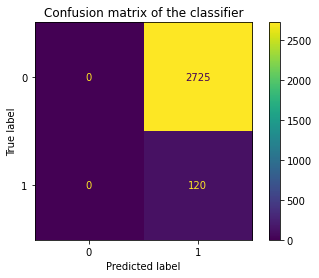

In [10]:
predictors = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type", "avg_glucose_level", "bmi",
 "smoking_status_smokes", "smoking_status_formerly", "reg_to_vote", "dog_owner", "raccoons_to_fight", "fast_food_budget_month", 
 "income_in_k", "er_visits"]

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["stroke"], test_size=0.2)
X_train.head()

zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

logr = LogisticRegression()
logr.fit(Xz_train, y_train)

predict = logr.predict(Xz_test)

plot_confusion_matrix(logr,X_test, y_test)
plt.title('Confusion matrix of the classifier')